<a href="https://colab.research.google.com/github/luisfelipebarreto/housing-prices-sp/blob/main/Projeto_de_parceria_SP_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo preditivo de aluguel para 3 bairros de São Paulo**

## 1\. Contexto

Neste exercício decidi analisar um dataset (link: https://www.kaggle.com/datasets/renatosn/sao-paulo-housing-prices) que contém informações sobre imóveis em alguns bairros na cidade de São Paulo.

O intuito é montar um modelo de regressão linear para tentar prever o valor do aluguel em determinados bairros da cidade de São Paulo tendo como informação a área do imóvel, número de quartos, número de vagas de garagem e o tipo do imóvel.

## 2\. Dados

### **2.1. Pacotes e bibliotecas**

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### **2.2. Análise Exploratória dos Dados**

In [2]:
df = pd.read_csv('/content/SP Housing Prices data.csv')
df


,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200


Vamos eliminar a coluna 'rent' do dataframe original, para focarmos apenas no valor final a pagar do aluguel (incluindo eventuais taxas).

In [3]:
df.drop(['rent'], axis=1, inplace=True)

In [4]:
df

,address,district,area,bedrooms,garage,type,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4654
...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,5778
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,17480
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,5467
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,10200


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,11657.0,84.655658,74.020536,0.0,40.0,60.0,96.0,580.0
bedrooms,11657.0,1.966286,0.931313,0.0,1.0,2.0,3.0,6.0
garage,11657.0,1.060393,1.132349,0.0,0.0,1.0,2.0,6.0
total,11657.0,4080.030625,3352.480274,509.0,1996.0,3057.0,4774.0,28700.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   total     11657 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 637.6+ KB


In [7]:
df['district'].value_counts()

district
Bela Vista               352
Vila Mariana             232
Jardim Paulista          220
Centro                   178
Pinheiros                159
                        ... 
Jardim do Carmo            1
Santa Inês                 1
Jardim Santa Efigenia      1
Vila Maricy                1
Retiro Morumbi             1
Name: count, Length: 1199, dtype: int64

Os bairros com maior número de dados são Bela Vista, Vila Mariana e Jardim Paulista. Vamos então desenvolver os modelos preditivos para esses bairros.

In [8]:
df['bedrooms'].value_counts()

bedrooms
2    4347
1    4193
3    2423
4     543
5      91
0      37
6      23
Name: count, dtype: int64

In [9]:
df['garage'].value_counts()

garage
1    4574
0    4118
2    1908
3     539
4     321
5     112
6      85
Name: count, dtype: int64

In [10]:
df['type'].value_counts()

type
Apartamento           7194
Casa                  2841
Studio e kitnet       1381
Casa em condomínio     241
Name: count, dtype: int64

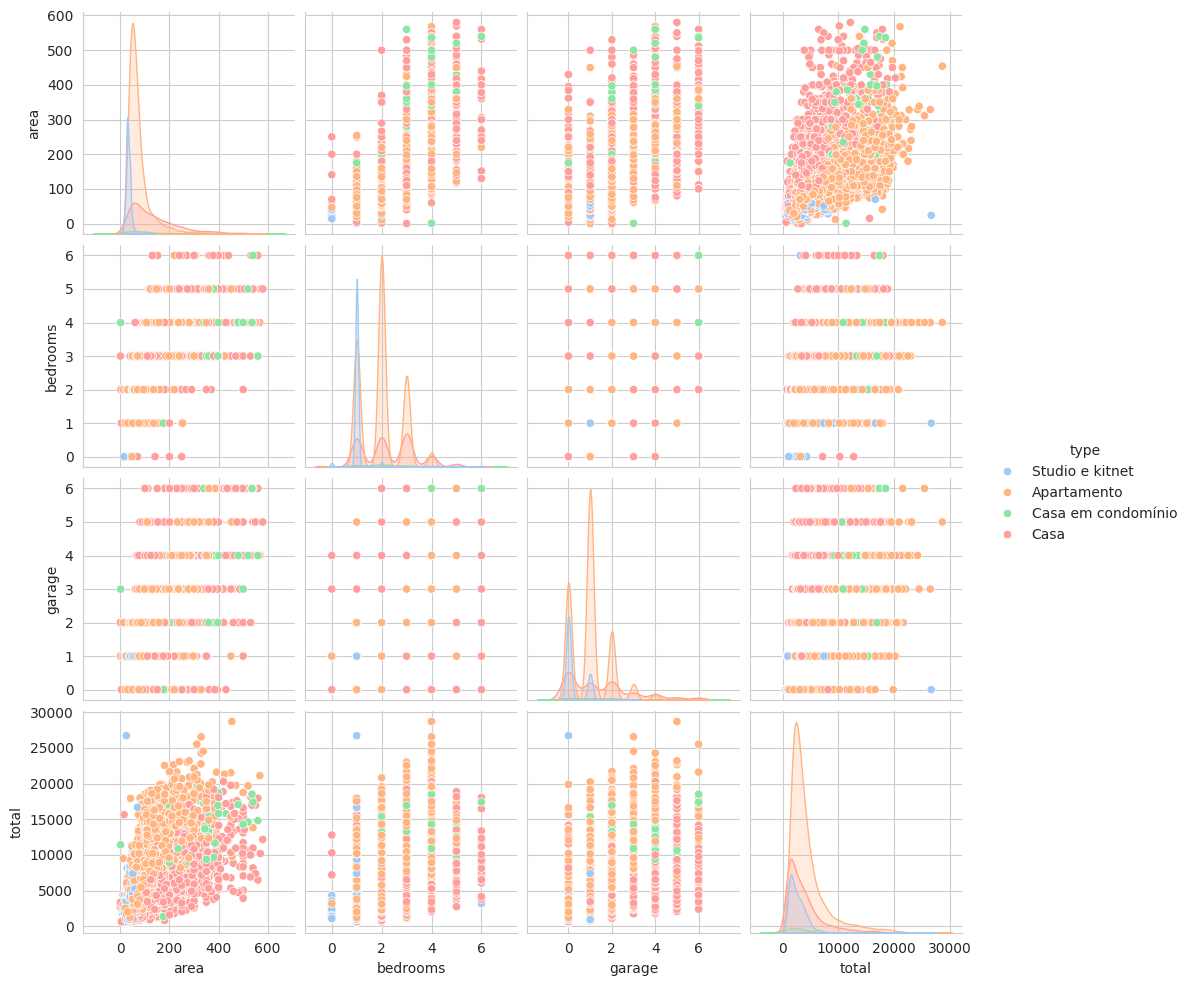

In [11]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=df, hue='type', palette="pastel")

In [12]:
df.isnull().sum()

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
total       0
dtype: int64

### **2.3. Variáveis numéricas**

Padronizando as colunas contendo variáveis numéricas.

In [13]:
colunas_num_para_padronizar = ['area', 'bedrooms', 'garage']

for coluna in colunas_num_para_padronizar:
    media = df[coluna].mean()
    desvio_padrao = df[coluna].std()
    df[f'{coluna}_std'] = df[coluna].apply(lambda x: (x-media) / desvio_padrao)

df


,address,district,area,bedrooms,garage,type,total,area_std,bedrooms_std,garage_std
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2939,-0.859973,-1.037553,-0.936454
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1345,-0.941032,-1.037553,-0.053334
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4661,-0.900502,-1.037553,-0.936454
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1954,-0.387131,0.036200,0.829786
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4654,-0.886992,-1.037553,-0.936454
...,...,...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,5778,0.126240,0.036200,-0.053334
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,17480,3.584740,2.183707,2.596026
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,5467,-0.008858,-1.037553,0.829786
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,10200,-0.116936,-1.037553,-0.936454


### **2.4. Variáveis categóricas**

Vou aplicar a técnica do one-hot-encoding para a variável categórica 'type', a qual descreve o tipo do imóvel em cada linha. Há 4 tipos de imóveis em nosso dataset.

In [14]:
df['Apto_nom'] = df['type'].apply(lambda tipo: 1 if tipo == 'Apartamento' else 0)
df['Casa_nom'] = df['type'].apply(lambda tipo: 1 if tipo == 'Casa' else 0)
df['Studio_kitnet_nom'] = df['type'].apply(lambda tipo: 1 if tipo == 'Studio e kitnet' else 0)
df['Casa_cond_nom'] = df['type'].apply(lambda tipo: 1 if tipo == 'Casa em condomínio' else 0)
df


,address,district,area,bedrooms,garage,type,total,area_std,bedrooms_std,garage_std,Apto_nom,Casa_nom,Studio_kitnet_nom,Casa_cond_nom
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2939,-0.859973,-1.037553,-0.936454,0,0,1,0
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1345,-0.941032,-1.037553,-0.053334,0,0,1,0
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4661,-0.900502,-1.037553,-0.936454,1,0,0,0
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1954,-0.387131,0.036200,0.829786,0,0,0,1
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4654,-0.886992,-1.037553,-0.936454,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,5778,0.126240,0.036200,-0.053334,1,0,0,0
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,17480,3.584740,2.183707,2.596026,1,0,0,0
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,5467,-0.008858,-1.037553,0.829786,1,0,0,0
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,10200,-0.116936,-1.037553,-0.936454,1,0,0,0


### **2.5. Limpeza dos dados**

Como bem sabemos, a localidade do imóvel é um dos principais (se não o principal) fatores para a variação de preço. Portanto, decidi montar a princípio 3 modelos preditivos, um para cada bairro com maior número de informações disponíveis no nosso dataset.

A começar pelo bairro Bela Vista, faremos uma limpeza nos dados desse bairro para facilitar a montagem do modelo.

In [15]:
df_Bela_Vista = df[df['district'] == 'Bela Vista']
df_Bela_Vista

,address,district,area,bedrooms,garage,type,total,area_std,bedrooms_std,garage_std,Apto_nom,Casa_nom,Studio_kitnet_nom,Casa_cond_nom
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4654,-0.886992,-1.037553,-0.936454,0,0,1,0
39,Av.nove de Julho,Bela Vista,25,1,0,Apartamento,3008,-0.805934,-1.037553,-0.936454,1,0,0,0
138,Rua Conselheiro Ramalho,Bela Vista,26,1,0,Studio e kitnet,2338,-0.792424,-1.037553,-0.936454,0,0,1,0
183,Rua Avanhandava,Bela Vista,24,1,0,Studio e kitnet,2892,-0.819444,-1.037553,-0.936454,0,0,1,0
184,Avenida Nove de Julho,Bela Vista,26,1,0,Studio e kitnet,1629,-0.792424,-1.037553,-0.936454,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11134,Avenida Angélica,Bela Vista,68,2,1,Apartamento,4162,-0.225014,0.036200,-0.053334,1,0,0,0
11158,Augusta,Bela Vista,100,2,2,Apartamento,16390,0.207298,0.036200,0.829786,1,0,0,0
11233,Avenida Paulista,Bela Vista,39,1,0,Apartamento,4119,-0.616797,-1.037553,-0.936454,1,0,0,0
11316,Avenida Paulista,Bela Vista,140,2,0,Apartamento,7532,0.747689,0.036200,-0.936454,1,0,0,0


In [16]:
df_Bela_Vista_padronizado = df_Bela_Vista.drop(['address', 'district', 'area', 'bedrooms', 'garage', 'type'], axis=1)
df_Bela_Vista_padronizado

,total,area_std,bedrooms_std,garage_std,Apto_nom,Casa_nom,Studio_kitnet_nom,Casa_cond_nom
4,4654,-0.886992,-1.037553,-0.936454,0,0,1,0
39,3008,-0.805934,-1.037553,-0.936454,1,0,0,0
138,2338,-0.792424,-1.037553,-0.936454,0,0,1,0
183,2892,-0.819444,-1.037553,-0.936454,0,0,1,0
184,1629,-0.792424,-1.037553,-0.936454,0,0,1,0
...,...,...,...,...,...,...,...,...
11134,4162,-0.225014,0.036200,-0.053334,1,0,0,0
11158,16390,0.207298,0.036200,0.829786,1,0,0,0
11233,4119,-0.616797,-1.037553,-0.936454,1,0,0,0
11316,7532,0.747689,0.036200,-0.936454,1,0,0,0


Agora do bairro Vila Mariana:

In [17]:
df_Vila_Mariana = df[df['district'] == 'Vila Mariana']
df_Vila_Mariana

,address,district,area,bedrooms,garage,type,total,area_std,bedrooms_std,garage_std,Apto_nom,Casa_nom,Studio_kitnet_nom,Casa_cond_nom
152,Rua Desembargador Aragão,Vila Mariana,40,1,1,Studio e kitnet,5471,-0.603287,-1.037553,-0.053334,0,0,1,0
445,Rua Gaspar Lourenço,Vila Mariana,50,2,0,Apartamento,4289,-0.468190,0.036200,-0.936454,1,0,0,0
458,Rua Humberto I,Vila Mariana,21,1,0,Studio e kitnet,4053,-0.859973,-1.037553,-0.936454,0,0,1,0
589,Rua Dionísio da Costa,Vila Mariana,33,1,1,Studio e kitnet,4040,-0.697856,-1.037553,-0.053334,0,0,1,0
701,Rua Doutor Nicolau de Sousa Queirós,Vila Mariana,50,2,0,Apartamento,2964,-0.468190,0.036200,-0.936454,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10117,Rua General Eloy Alfaro,Vila Mariana,230,3,2,Casa,4968,1.963568,1.109954,0.829786,0,1,0,0
10120,Rua Gandavo,Vila Mariana,143,3,2,Apartamento,9727,0.788218,1.109954,0.829786,1,0,0,0
10133,Rua Alberto Afonso Martins,Vila Mariana,200,3,1,Apartamento,5198,1.558275,1.109954,-0.053334,1,0,0,0
10501,Rua Paulo Célso Costa,Vila Mariana,30,1,0,Casa,638,-0.738385,-1.037553,-0.936454,0,1,0,0


In [18]:
df_Vila_Mariana_padronizado = df_Vila_Mariana.drop(['address', 'district', 'area', 'bedrooms', 'garage', 'type'], axis=1)
df_Vila_Mariana_padronizado

,total,area_std,bedrooms_std,garage_std,Apto_nom,Casa_nom,Studio_kitnet_nom,Casa_cond_nom
152,5471,-0.603287,-1.037553,-0.053334,0,0,1,0
445,4289,-0.468190,0.036200,-0.936454,1,0,0,0
458,4053,-0.859973,-1.037553,-0.936454,0,0,1,0
589,4040,-0.697856,-1.037553,-0.053334,0,0,1,0
701,2964,-0.468190,0.036200,-0.936454,1,0,0,0
...,...,...,...,...,...,...,...,...
10117,4968,1.963568,1.109954,0.829786,0,1,0,0
10120,9727,0.788218,1.109954,0.829786,1,0,0,0
10133,5198,1.558275,1.109954,-0.053334,1,0,0,0
10501,638,-0.738385,-1.037553,-0.936454,0,1,0,0


Por fim, do bairro Jardim Paulista:

In [19]:
df_Jardim_Paulista = df[df['district'] == 'Jardim Paulista']
df_Jardim_Paulista

,address,district,area,bedrooms,garage,type,total,area_std,bedrooms_std,garage_std,Apto_nom,Casa_nom,Studio_kitnet_nom,Casa_cond_nom
277,Rua Batataes,Jardim Paulista,54,1,2,Apartamento,6316,-0.414151,-1.037553,0.829786,1,0,0,0
315,Rua Batataes,Jardim Paulista,34,1,1,Studio e kitnet,5288,-0.684346,-1.037553,-0.053334,0,0,1,0
389,Rua Peixoto Gomide,Jardim Paulista,45,1,0,Studio e kitnet,2044,-0.535739,-1.037553,-0.936454,0,0,1,0
405,Rua Maestro Elias Lobo,Jardim Paulista,78,2,0,Apartamento,5696,-0.089916,0.036200,-0.936454,1,0,0,0
429,Rua Saint Hilaire,Jardim Paulista,32,1,1,Studio e kitnet,2879,-0.711366,-1.037553,-0.053334,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11323,Alameda Franca,Jardim Paulista,174,3,2,Apartamento,9851,1.207021,1.109954,0.829786,1,0,0,0
11331,Alameda Franca,Jardim Paulista,258,3,1,Apartamento,19140,2.341841,1.109954,-0.053334,1,0,0,0
11332,Alameda Casa Branca,Jardim Paulista,37,1,1,Apartamento,3877,-0.643817,-1.037553,-0.053334,1,0,0,0
11333,Alameda Ministro Rocha Azevedo,Jardim Paulista,180,3,4,Apartamento,22540,1.288080,1.109954,2.596026,1,0,0,0


In [20]:
df_Jardim_Paulista_padronizado = df_Jardim_Paulista.drop(['address', 'district', 'area', 'bedrooms', 'garage', 'type'], axis=1)
df_Jardim_Paulista_padronizado

,total,area_std,bedrooms_std,garage_std,Apto_nom,Casa_nom,Studio_kitnet_nom,Casa_cond_nom
277,6316,-0.414151,-1.037553,0.829786,1,0,0,0
315,5288,-0.684346,-1.037553,-0.053334,0,0,1,0
389,2044,-0.535739,-1.037553,-0.936454,0,0,1,0
405,5696,-0.089916,0.036200,-0.936454,1,0,0,0
429,2879,-0.711366,-1.037553,-0.053334,0,0,1,0
...,...,...,...,...,...,...,...,...
11323,9851,1.207021,1.109954,0.829786,1,0,0,0
11331,19140,2.341841,1.109954,-0.053334,1,0,0,0
11332,3877,-0.643817,-1.037553,-0.053334,1,0,0,0
11333,22540,1.288080,1.109954,2.596026,1,0,0,0


## 3\. Modelos

### **3.1. Bairro Bela Vista**

#### **3.1.1. Separação dos dados de treino e de teste para o bairro Bela Vista**

In [21]:
predictors_train_BV, predictors_test_BV, target_train_BV, target_test_BV = train_test_split(
    df_Bela_Vista_padronizado.drop(['total'], axis=1),
    df_Bela_Vista_padronizado['total'],
    test_size= 1/3,
    random_state=123
)

#### **3.1.2. Treino do modelo para o bairro Bela Vista**

In [22]:
model_BV = LinearRegression()
model_BV = model_BV.fit(predictors_train_BV, target_train_BV)

#### **3.1.3. RMSE para o modelo de regressão linear do bairro Bela Vista**

In [23]:
target_predicted_BV = model_BV.predict(predictors_test_BV)

In [24]:
rmse_BV = np.sqrt(mean_squared_error(target_test_BV, target_predicted_BV))
print(rmse_BV)

1456.797443921528


In [25]:
media_preco_Bela_Vista = df_Bela_Vista['total'].mean()
print(media_preco_Bela_Vista)

3372.315340909091


In [26]:
print('O RMSE calculado representa aproximadamente', round((rmse_BV/media_preco_Bela_Vista)*100, 2),'% da média do preço do aluguel no bairro Bela Vista')

O RMSE calculado representa aproximadamente 43.2 % da média do preço do aluguel no bairro Bela Vista


#### **3.1.4. Predição Preço de aluguel de um imóvel no bairro Bela Vista**

Para facilitar futuras consultas, aloquei o código em uma função chamada 'calcular_preco_aluguel_imovel_BV'.

In [27]:
precos_aluguel_preditos_BV = []

def calcular_preco_aluguel_imovel_BV():

  area_imovel_novo_BV = float(input('Insira a área em m² do imóvel que deseja calcular o preço do aluguel:'))
  bedrooms_imovel_novo_BV = float(input('Insira o número de quartos do imóvel que deseja calcular o preço do aluguel:'))
  garage_imovel_novo_BV = float(input('Insira o número de vagas de garagem do imóvel que deseja calcular o preço do aluguel:'))
  tipo_imovel_novo_BV = float(input('Insira o tipo do imóvel que deseja calcular o preço do aluguel (Digite: 1 para Apartamento, 2 para Casa, 3 para Studio e kitnet ou 4 para Casa em condomínio):'))

  area_padronizada_imovel_novo_BV = (area_imovel_novo_BV - df_Bela_Vista['area'].mean()) / df_Bela_Vista['area'].std()
  bedrooms_padronizada_imovel_novo_BV = (bedrooms_imovel_novo_BV - df_Bela_Vista['bedrooms'].mean()) / df_Bela_Vista['bedrooms'].std()
  garage_padronizada_imovel_novo_BV = (garage_imovel_novo_BV - df_Bela_Vista['garage'].mean()) / df_Bela_Vista['garage'].std()

  if tipo_imovel_novo_BV == 1:
    imovel_novo_BV = np.array([area_padronizada_imovel_novo_BV, bedrooms_padronizada_imovel_novo_BV, garage_padronizada_imovel_novo_BV, 1, 0, 0, 0])

  elif tipo_imovel_novo_BV == 2:
    imovel_novo_BV = np.array([area_padronizada_imovel_novo_BV, bedrooms_padronizada_imovel_novo_BV, garage_padronizada_imovel_novo_BV, 0, 1, 0, 0])

  elif tipo_imovel_novo_BV == 3:
    imovel_novo_BV = np.array([area_padronizada_imovel_novo_BV, bedrooms_padronizada_imovel_novo_BV, garage_padronizada_imovel_novo_BV, 0, 0, 1, 0])

  elif tipo_imovel_novo_BV == 4:
    imovel_novo_BV = np.array([area_padronizada_imovel_novo_BV, bedrooms_padronizada_imovel_novo_BV, garage_padronizada_imovel_novo_BV, 0, 0, 0, 1])

  else:
    print("Tipo de imóvel não identificado:", tipo_imovel_novo_BV)

  print(imovel_novo_BV)

  preco_aluguel_predito_imovel_novo_BV = model_BV.predict(imovel_novo_BV.reshape(1, -1))
  print('O preço de aluguel previsto para o imóvel em questão no bairro Bela Vista em São Paulo é de R$', preco_aluguel_predito_imovel_novo_BV)

  precos_aluguel_preditos_BV.append(float(preco_aluguel_predito_imovel_novo_BV))

In [28]:
calcular_preco_aluguel_imovel_BV()

Insira a área em m² do imóvel que deseja calcular o preço do aluguel:50
Insira o número de quartos do imóvel que deseja calcular o preço do aluguel:2
Insira o número de vagas de garagem do imóvel que deseja calcular o preço do aluguel:1
Insira o tipo do imóvel que deseja calcular o preço do aluguel (Digite: 1 para Apartamento, 2 para Casa, 3 para Studio e kitnet ou 4 para Casa em condomínio):3
[0.01487554 1.30435929 1.10914747 0.         0.         1.
 0.        ]
O preço de aluguel previsto para o imóvel em questão no bairro Bela Vista em São Paulo é de R$ [8141.65378803]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-27-e3ba2e01f733>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  precos_aluguel_preditos_BV.append(float(preco_aluguel_predito_imovel_novo_BV))


In [29]:
precos_aluguel_preditos_BV[0]

8141.653788027386

### **3.2. Bairro Vila Mariana**

#### **3.2.1. Separação dos dados de treino e de teste para o bairro Vila Mariana**

In [30]:
predictors_train_VM, predictors_test_VM, target_train_VM, target_test_VM = train_test_split(
    df_Vila_Mariana_padronizado.drop(['total'], axis=1),
    df_Vila_Mariana_padronizado['total'],
    test_size= 1/3,
    random_state=123
)

#### **3.2.2. Treino do modelo para o bairro Vila Mariana**

In [31]:
model_VM = LinearRegression()
model_VM = model_VM.fit(predictors_train_VM, target_train_VM)

#### **3.2.3. RMSE para o modelo de regressão linear do bairro Vila Mariana**

In [32]:
target_predicted_VM = model_VM.predict(predictors_test_VM)

In [33]:
rmse_VM = np.sqrt(mean_squared_error(target_test_VM, target_predicted_VM))
print(rmse_VM)

2519.058829860332


In [34]:
media_preco_Vila_Mariana = df_Vila_Mariana['total'].mean()
print(media_preco_Vila_Mariana)

5058.362068965517


In [35]:
print('O RMSE calculado representa aproximadamente', round((rmse_VM/media_preco_Vila_Mariana)*100, 2),'% da média do preço do aluguel no bairro Vila Mariana')

O RMSE calculado representa aproximadamente 49.8 % da média do preço do aluguel no bairro Vila Mariana


#### **3.2.4. Predição Preço de aluguel de um imóvel no bairro Vila Mariana**

Para facilitar futuras consultas, aloquei o código em uma função chamada 'calcular_preco_aluguel_imovel_VM'.

In [36]:
precos_aluguel_preditos_VM = []

def calcular_preco_aluguel_imovel_VM():

  area_imovel_novo_VM = float(input('Insira a área em m² do imóvel que deseja calcular o preço do aluguel:'))
  bedrooms_imovel_novo_VM = float(input('Insira o número de quartos do imóvel que deseja calcular o preço do aluguel:'))
  garage_imovel_novo_VM = float(input('Insira o número de vagas de garagem do imóvel que deseja calcular o preço do aluguel:'))
  tipo_imovel_novo_VM = float(input('Insira o tipo do imóvel que deseja calcular o preço do aluguel (Digite: 1 para Apartamento, 2 para Casa, 3 para Studio e kitnet ou 4 para Casa em condomínio):'))

  area_padronizada_imovel_novo_VM = (area_imovel_novo_VM - df_Vila_Mariana['area'].mean()) / df_Vila_Mariana['area'].std()
  bedrooms_padronizada_imovel_novo_VM = (bedrooms_imovel_novo_VM - df_Vila_Mariana['bedrooms'].mean()) / df_Vila_Mariana['bedrooms'].std()
  garage_padronizada_imovel_novo_VM = (garage_imovel_novo_VM - df_Vila_Mariana['garage'].mean()) / df_Vila_Mariana['garage'].std()

  if tipo_imovel_novo_VM == 1:
    imovel_novo_VM = np.array([area_padronizada_imovel_novo_VM, bedrooms_padronizada_imovel_novo_VM, garage_padronizada_imovel_novo_VM, 1, 0, 0, 0])

  elif tipo_imovel_novo_VM == 2:
    imovel_novo_VM = np.array([area_padronizada_imovel_novo_VM, bedrooms_padronizada_imovel_novo_VM, garage_padronizada_imovel_novo_VM, 0, 1, 0, 0])

  elif tipo_imovel_novo_VM == 3:
    imovel_novo_VM = np.array([area_padronizada_imovel_novo_VM, bedrooms_padronizada_imovel_novo_VM, garage_padronizada_imovel_novo_VM, 0, 0, 1, 0])

  elif tipo_imovel_novo_VM == 4:
    imovel_novo_VM = np.array([area_padronizada_imovel_novo_VM, bedrooms_padronizada_imovel_novo_VM, garage_padronizada_imovel_novo_VM, 0, 0, 0, 1])

  else:
    print("Tipo de imóvel não identificado:", tipo_imovel_novo_VM)

  print(imovel_novo_VM)

  preco_aluguel_predito_imovel_novo_VM = model_VM.predict(imovel_novo_VM.reshape(1, -1))
  print('O preço de aluguel previsto para o imóvel em questão no bairro Vila Mariana em São Paulo é de R$', preco_aluguel_predito_imovel_novo_VM)

  precos_aluguel_preditos_VM.append(float(preco_aluguel_predito_imovel_novo_VM))

In [37]:
calcular_preco_aluguel_imovel_VM()

Insira a área em m² do imóvel que deseja calcular o preço do aluguel:50
Insira o número de quartos do imóvel que deseja calcular o preço do aluguel:2
Insira o número de vagas de garagem do imóvel que deseja calcular o preço do aluguel:1
Insira o tipo do imóvel que deseja calcular o preço do aluguel (Digite: 1 para Apartamento, 2 para Casa, 3 para Studio e kitnet ou 4 para Casa em condomínio):3
[-0.42376625  0.18201974  0.22731251  0.          0.          1.
  0.        ]
O preço de aluguel previsto para o imóvel em questão no bairro Vila Mariana em São Paulo é de R$ [5786.34253705]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-36-07db4c595939>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  precos_aluguel_preditos_VM.append(float(preco_aluguel_predito_imovel_novo_VM))


In [38]:
precos_aluguel_preditos_VM[0]

5786.342537052685

### **3.3. Bairro Jardim Paulista**

#### **3.3.1. Separação dos dados de treino e de teste para o bairro Jardim Paulista**

In [39]:
predictors_train_JP, predictors_test_JP, target_train_JP, target_test_JP = train_test_split(
    df_Jardim_Paulista_padronizado.drop(['total'], axis=1),
    df_Jardim_Paulista_padronizado['total'],
    test_size= 1/3,
    random_state=123
)

#### **3.3.2. Treino do modelo para o bairro Jardim Paulista**

In [40]:
model_JP = LinearRegression()
model_JP = model_JP.fit(predictors_train_JP, target_train_JP)

#### **3.3.3. RMSE para o modelo de regressão linear do bairro Jardim Paulista**

In [41]:
target_predicted_JP = model_JP.predict(predictors_test_JP)

In [42]:
rmse_JP = np.sqrt(mean_squared_error(target_test_JP, target_predicted_JP))
print(rmse_JP)

2487.3684466307914


In [43]:
media_preco_Jardim_Paulista = df_Jardim_Paulista['total'].mean()
print(media_preco_Jardim_Paulista)

8545.718181818182


In [44]:
print('O RMSE calculado representa aproximadamente', round((rmse_JP/media_preco_Jardim_Paulista)*100, 2),'% da média do preço do aluguel no bairro Jardim Paulista')

O RMSE calculado representa aproximadamente 29.11 % da média do preço do aluguel no bairro Jardim Paulista


#### **3.3.4. Predição Preço de aluguel de um imóvel no bairro Jardim Paulista**

Para facilitar futuras consultas, aloquei o código em uma função chamada 'calcular_preco_aluguel_imovel_JP'.

In [45]:
precos_aluguel_preditos_JP = []

def calcular_preco_aluguel_imovel_JP():

  area_imovel_novo_JP = float(input('Insira a área em m² do imóvel que deseja calcular o preço do aluguel:'))
  bedrooms_imovel_novo_JP = float(input('Insira o número de quartos do imóvel que deseja calcular o preço do aluguel:'))
  garage_imovel_novo_JP = float(input('Insira o número de vagas de garagem do imóvel que deseja calcular o preço do aluguel:'))
  tipo_imovel_novo_JP = float(input('Insira o tipo do imóvel que deseja calcular o preço do aluguel (Digite: 1 para Apartamento, 2 para Casa, 3 para Studio e kitnet ou 4 para Casa em condomínio):'))

  area_padronizada_imovel_novo_JP = (area_imovel_novo_JP - df_Jardim_Paulista['area'].mean()) / df_Jardim_Paulista['area'].std()
  bedrooms_padronizada_imovel_novo_JP = (bedrooms_imovel_novo_JP - df_Jardim_Paulista['bedrooms'].mean()) / df_Jardim_Paulista['bedrooms'].std()
  garage_padronizada_imovel_novo_JP = (garage_imovel_novo_JP - df_Jardim_Paulista['garage'].mean()) / df_Jardim_Paulista['garage'].std()

  if tipo_imovel_novo_JP == 1:
    imovel_novo_JP = np.array([area_padronizada_imovel_novo_JP, bedrooms_padronizada_imovel_novo_JP, garage_padronizada_imovel_novo_JP, 1, 0, 0, 0])

  elif tipo_imovel_novo_JP == 2:
    imovel_novo_JP = np.array([area_padronizada_imovel_novo_JP, bedrooms_padronizada_imovel_novo_JP, garage_padronizada_imovel_novo_JP, 0, 1, 0, 0])

  elif tipo_imovel_novo_JP == 3:
    imovel_novo_JP = np.array([area_padronizada_imovel_novo_JP, bedrooms_padronizada_imovel_novo_JP, garage_padronizada_imovel_novo_JP, 0, 0, 1, 0])

  elif tipo_imovel_novo_JP == 4:
    imovel_novo_JP = np.array([area_padronizada_imovel_novo_JP, bedrooms_padronizada_imovel_novo_JP, garage_padronizada_imovel_novo_JP, 0, 0, 0, 1])

  else:
    print("Tipo de imóvel não identificado:", tipo_imovel_novo_JP)

  print(imovel_novo_JP)

  preco_aluguel_predito_imovel_novo_JP = model_JP.predict(imovel_novo_JP.reshape(1, -1))
  print('O preço de aluguel previsto para o imóvel em questão no bairro Jardim Paulista em São Paulo é de R$', preco_aluguel_predito_imovel_novo_JP)

  precos_aluguel_preditos_JP.append(float(preco_aluguel_predito_imovel_novo_JP))

In [46]:
calcular_preco_aluguel_imovel_JP()

Insira a área em m² do imóvel que deseja calcular o preço do aluguel:50
Insira o número de quartos do imóvel que deseja calcular o preço do aluguel:2
Insira o número de vagas de garagem do imóvel que deseja calcular o preço do aluguel:1
Insira o tipo do imóvel que deseja calcular o preço do aluguel (Digite: 1 para Apartamento, 2 para Casa, 3 para Studio e kitnet ou 4 para Casa em condomínio):3
[-0.78967654 -0.12983233 -0.24569331  0.          0.          1.
  0.        ]
O preço de aluguel previsto para o imóvel em questão no bairro Jardim Paulista em São Paulo é de R$ [5524.22191613]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-45-3a80072bab00>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  precos_aluguel_preditos_JP.append(float(preco_aluguel_predito_imovel_novo_JP))


In [47]:
precos_aluguel_preditos_JP[0]

5524.221916125171

## 4\. Visualização de um exemplo de imóvel

Digamos que ma família procura um studio com aproximadamente 50 m², que tenha 2 quartos e 1 garagem e gosta dos bairros Bela Vista, Vila Mariana e Jardim Paulista. Com os modelos, podemos gerar fáceis visualizações para demonstrar à família o preço previsto de aluguel para um imóvel com as condições que eles gostariam. Podemos até facilmente mudar o tipo do imóvel para sabermos se há vantagem em talvez até aumentar a metragem do imóvel e diminuir o preço nos bairros em questão.

A título de exemplificar, padronizei o exemplo para um studio com 50 m², 2 quartos e 1 garagem em todos os bairros para visualizar melhor a diferença de preço do mesmo estilo de imóvel em bairros diferentes da cidade.

Na função adicionei uma lista para que os valores que simulamos pudessem ser armazenados, para assim facilitar gerar os gráficos comparativos. Caso o código seja puramente para uma consulta de simulação, há a opção de retirar a lista vazia e o '.append' da função.



In [48]:
bairros = ["Bela Vista", "Vila Mariana", "Jardim Paulista"]
precos_aluguel_predito = [precos_aluguel_preditos_BV[0], precos_aluguel_preditos_VM[0], precos_aluguel_preditos_JP[0]]

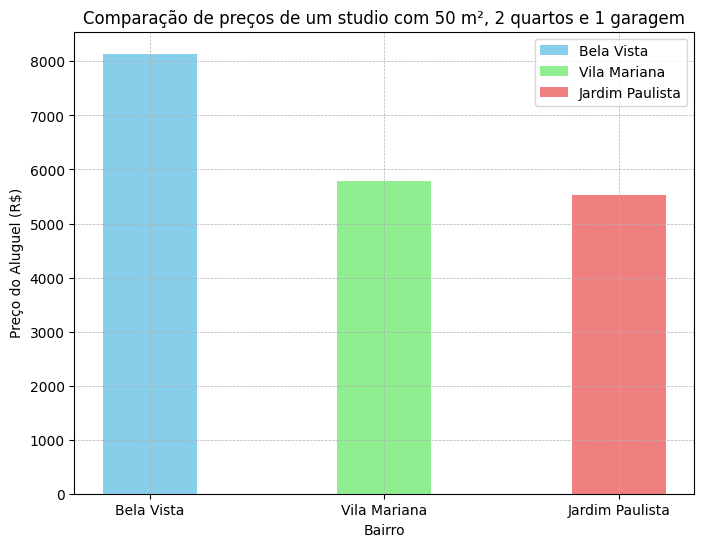

In [49]:
cores = ['skyblue', 'lightgreen', 'lightcoral']

plt.figure(figsize=(8, 6))  # Ajustar tamanho do gráfico se necessário
ax = plt.subplot()

barras = ax.bar(bairros, precos_aluguel_predito, color=cores, width=0.4)

plt.title("Comparação de preços de um studio com 50 m², 2 quartos e 1 garagem")
plt.xlabel("Bairro")
plt.ylabel("Preço do Aluguel (R$)")

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(barras, bairros)

plt.show()